In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.linalg as LA

In [2]:
import Function as f

Hyper parameter

In [3]:
max_iteration = 10000
weight_decay = 1e-5
NUM_EMPLOYEES = 1200
NUM_TRAIN = 1000
NUM_VAL = 200
Epsilons = [10,10]
NUM_FEATURES = 5
BANDWIDTH = 0.5

Define the Training Set, the Life-Time Matrix and Gaussian Kernel.

In [4]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_EMPLOYEES, NUM_FEATURES, Epsilons, bias = False)

Discard the top 5% longevity training samples

In [5]:
five_percent = int(len(survival_times) * 0.05)
five_percent_indices = np.argsort(survival_times)[(-1) * five_percent:]
threshold_age = survival_times[five_percent_indices[0]]
survival_times[five_percent_indices] = threshold_age

for i in five_percent_indices:
    while(True):
        _lambda = 0
        Epsilon_1, Epsilon_2 = Epsilons
        while (True):
            X[i] = np.random.multivariate_normal(np.zeros(NUM_FEATURES), np.eye(NUM_FEATURES))
            _lambda = Epsilon_1 * np.sum(X[i, :] ** 2) + Epsilon_2 * np.sum(X[i, :])
            if _lambda > 0:
                break
            
        
        age = np.ceil(np.random.exponential(_lambda, size=1))
        if age <= threshold_age:
            survival_times[i] = age
            break

NUM_TASKS = int(np.max(survival_times))
Y = np.ones((NUM_EMPLOYEES, NUM_TASKS))
# the lifetime matrix of all employees, if one employee leave at the time interval k, then from Y[i,k](inlcude)  all entries are -1
for i in range(NUM_EMPLOYEES):
    Y[i, int(survival_times[i]):] = -1

In [6]:
X_train = X[:NUM_TRAIN]
X_val = X[NUM_TRAIN:]
Y_train = Y[:NUM_TRAIN]
Y_val = Y[NUM_TRAIN:]

In [7]:
# Kernel_Matrix = f.Generating_Kernel(X, "Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix = f.Generating_Kernel(X, "Quick_Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix_Train = Kernel_Matrix[:NUM_TRAIN,:NUM_TRAIN]
Kernel_Matrix_Val = Kernel_Matrix[NUM_TRAIN:,:NUM_TRAIN]

The Stochastic sub-Gradient Descent is shown below

There are  1422142 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  42.01840041289829 and the median is: 29.0
There are  9230 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  27.624485373781148 and the median is: 17.0
There are  3820 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  26.487958115183247 and the median is: 15.0
There are  1692 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  25.6903073286052 and the median is: 15.0
There are  884 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  27.328054298642535 and the median is: 16.0
There are  496 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  24.04032258064516 and the median is: 13.0
There are  310 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  23.46451612903226 and the median is: 15.0
There are  152 pai

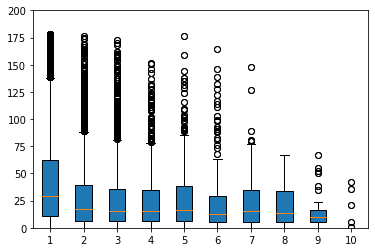

In [8]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

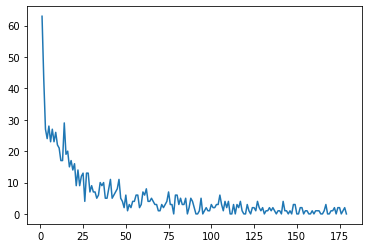

In [9]:
NUM_TASKS = Y.shape[1]
x_axis = np.arange(NUM_TASKS)+1
y_train_gt_axis = np.zeros(NUM_TASKS)
for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis)

In [10]:
print(NUM_TASKS)
## DEL TOP 5%

179


In [11]:
alpha = np.zeros_like(Y_train) 
predict_age = np.zeros(NUM_EMPLOYEES) 
index = 0
for t in range(1, max_iteration+1):

    alpha = f.Kernel_Pegasos_nonchecking(1, Kernel_Matrix_Train, alpha, Y_train, t, weight_decay)
    # alpha = f.Kernel_Pegasos(1, Kernel_Matrix_Train, alpha, Y_train, t, weight_decay)

    if t% 100 == 0: 
        print("the iteration is:", t)
        hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) / ( t * weight_decay )
        
        hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) / ( t * weight_decay )
        
        predict_age_tr = f.Ages(hatY_train)
        predict_age_val = f.Ages(hatY_val)
        predict_age = predict_age_tr + predict_age_val
            
        acc_train = np.sum(Y_train * hatY_train > 0) / (NUM_TRAIN * NUM_TASKS)
        acc_val = np.sum(Y_val * hatY_val > 0) / (NUM_VAL * NUM_TASKS)
        print("the train accuracy is:", acc_train)
        print("the val accuracy is:", acc_val)
        
        # C_index_tr = f.Calculate_C_index(survival_times[:NUM_TRAIN], predict_age_tr)
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
         
        # print("the c-index for training is:", C_index_tr)xx
        print("the c-index for val is:", C_index_val)
  
print(np.sum(predict_age[NUM_TRAIN:] == survival_times[NUM_TRAIN:])/(NUM_VAL))

the iteration is: 100
the train accuracy is: 0.7796201117318435
the val accuracy is: 0.7855307262569833
10454 19584.0
the c-index for val is: 0.5338031045751634
the iteration is: 200
the train accuracy is: 0.8071843575418994
the val accuracy is: 0.7855027932960894
10491 19584.0
the c-index for val is: 0.5356924019607843
the iteration is: 300
the train accuracy is: 0.8220558659217877
the val accuracy is: 0.7960055865921788
10461 19584.0
the c-index for val is: 0.5341605392156863
the iteration is: 400
the train accuracy is: 0.8406927374301676
the val accuracy is: 0.8094692737430168
10940 19584.0
the c-index for val is: 0.5586192810457516
the iteration is: 500
the train accuracy is: 0.8419832402234637
the val accuracy is: 0.792290502793296
11193 19584.0
the c-index for val is: 0.5715379901960784
the iteration is: 600
the train accuracy is: 0.8509553072625698
the val accuracy is: 0.8033798882681564
11087 19584.0
the c-index for val is: 0.566125408496732
the iteration is: 700
the train accu

the iteration is: 5500
the train accuracy is: 0.9916256983240224
the val accuracy is: 0.8210893854748603
12306 19584.0
the c-index for val is: 0.6283700980392157
the iteration is: 5600
the train accuracy is: 0.9919553072625699
the val accuracy is: 0.8210614525139664
12246 19584.0
the c-index for val is: 0.6253063725490197
the iteration is: 5700
the train accuracy is: 0.9922849162011174
the val accuracy is: 0.820391061452514
12230 19584.0
the c-index for val is: 0.6244893790849673
the iteration is: 5800
the train accuracy is: 0.992782122905028
the val accuracy is: 0.8204748603351956
12194 19584.0
the c-index for val is: 0.6226511437908496
the iteration is: 5900
the train accuracy is: 0.9926480446927375
the val accuracy is: 0.820195530726257
12173 19584.0
the c-index for val is: 0.6215788398692811
the iteration is: 6000
the train accuracy is: 0.9930335195530726
the val accuracy is: 0.8204189944134078
12089 19584.0
the c-index for val is: 0.6172896241830066
the iteration is: 6100
the trai

In [ ]:
alpha = np.zeros_like(Y_train)
beta = np.zeros((NUM_TRAIN,NUM_TASKS,NUM_TASKS))
for t in range(1, max_iteration + 1):
    alpha, beta = f.new_C2(Kernel_Matrix_Train, Y_train, alpha, beta, 1, t, weight_decay)
    
    if t%500 == 0: 
        print("the iteration is:", t)
        hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) 
        for i in range(NUM_TRAIN):
            hstack_M_K_i = Kernel_Matrix_Train[i].repeat(NUM_TASKS).reshape(NUM_TRAIN, NUM_TASKS)
            hatY_train += hstack_M_K_i.dot(beta[i, :, :])
        hatY_train /= ( t * weight_decay )
        
        hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) 
        for i in range(NUM_TRAIN):
            hstack_M_K_i = Kernel_Matrix_Val[:,i].repeat(NUM_TASKS).reshape(NUM_VAL, NUM_TASKS)
            hatY_val += hstack_M_K_i.dot(beta[i, :, :])
        hatY_val /= ( t * weight_decay )
        
        predict_age_tr = f.Ages(hatY_train)
        predict_age_val = f.Ages(hatY_val)
        predict_age = predict_age_tr + predict_age_val
            
        acc_train = np.sum(Y_train * hatY_train > 0) / (NUM_TRAIN * NUM_TASKS)
        acc_val = np.sum(Y_val * hatY_val > 0) / (NUM_VAL * NUM_TASKS)
        print("the train accuracy is:", acc_train)
        print("the val accuracy is:", acc_val)
        
        # C_index_tr = f.Calculate_C_index(survival_times[:NUM_TRAIN], predict_age_tr)
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
         
        # print("the c-index for training is:", C_index_tr)xx
        print("the c-index for val is:", C_index_val)

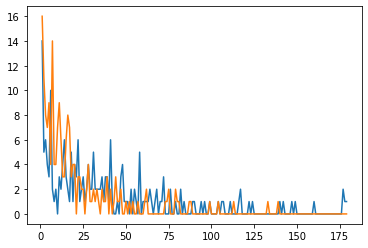

In [12]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
# plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
# plt.subplot(211)
# plt.plot(x_axis, y_val_gt_axis)
# plt.subplot(212)
# plt.plot(x_axis, y_val_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)

In [13]:
print(predict_age[NUM_TRAIN:])
print(survival_times[NUM_TRAIN:])
print(np.sum(predict_age[NUM_TRAIN:] > survival_times[NUM_TRAIN:]))
print(np.sum(predict_age[NUM_TRAIN:] < survival_times[NUM_TRAIN:]))
print(np.sum(predict_age[NUM_TRAIN:] == survival_times[NUM_TRAIN:]))

[5, 24, 36, 7, 46, 17, 87, 18, 47, 139, 6, 12, 4, 41, 16, 1, 7, 15, 28, 3, 17, 2, 25, 13, 7, 16, 1, 17, 2, 32, 12, 41, 1, 8, 3, 1, 7, 34, 57, 10, 5, 17, 44, 29, 5, 10, 10, 8, 27, 31, 15, 16, 62, 1, 61, 8, 11, 37, 33, 12, 18, 80, 44, 27, 1, 75, 54, 1, 5, 7, 28, 14, 7, 1, 11, 14, 11, 45, 31, 73, 2, 17, 2, 7, 3, 33, 39, 6, 4, 8, 19, 75, 4, 1, 16, 62, 20, 12, 10, 18, 47, 7, 113, 12, 3, 7, 16, 13, 50, 20, 20, 3, 133, 74, 2, 9, 28, 2, 9, 19, 38, 24, 2, 5, 39, 1, 3, 1, 13, 15, 23, 25, 99, 9, 1, 7, 52, 30, 16, 19, 20, 5, 7, 79, 1, 4, 2, 79, 22, 10, 6, 2, 16, 15, 11, 2, 15, 6, 9, 3, 11, 4, 2, 5, 15, 43, 11, 22, 17, 17, 10, 23, 5, 11, 44, 81, 104, 4, 12, 5, 4, 7, 16, 36, 23, 11, 11, 3, 10, 7, 1, 19, 28, 14, 7, 39, 1, 22, 88, 1]
[  3.  41.  11.  27.  30.   1.  31.   1.  58.  55.  22.   8.  12.  72.
 116.   1.  22.  28.  49. 149.  14.  22.  29.  38.  94.  76.   1.  21.
  82.  58.   1.  15.   3.  39.  71.   1.   3.   9.  55.  16.  47.  35.
 140.  15.   7.  31.  18.  53.  22.  26.  25. 107.  13.   3

In [14]:
hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) / (max_iteration * weight_decay )

In [ ]:
hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) 
for i in range(NUM_TRAIN):
    hstack_M_K_i = Kernel_Matrix_Val[:,i].repeat(NUM_TASKS).reshape(NUM_VAL, NUM_TASKS)
    hatY_val += hstack_M_K_i.dot(beta[i, :, :])
hatY_val /= ( max_iteration * weight_decay )


In [15]:
violate = 0
for i in range(NUM_VAL):
    first_minus = np.argwhere(hatY_val[i] < 0)[0][0]
    # print(first_minus)
    after_pos_list = np.argwhere(hatY_val[i, first_minus:] > 0)
    # print(after_pos_list)
    if len(after_pos_list):
        # print(after_pos_list)
        violate += 1

print(violate)
print(NUM_VAL)
# print(survival_times[-NUM_VAL])

124
200


In [ ]:
print(hatY_val)